# Python Excercise :  Simple Linear Regression

> ## Table of Contents

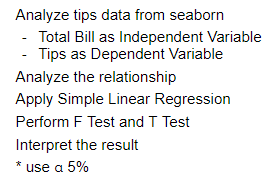


> ## Library

In [1]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

> ## Dataset : Tips Dataset

Dataset Description:
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

From This information we frame the problem :
1. Problem Statements : How migh we predict tips that will be recieved by food servers so we can minimize unfair treatment ?
1. Data :
  1. Label : Tips
  1. Features : Total Bill
1. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.
1. Action : Make food servers allocation
1. Value : the sake of staff morale

In [2]:
tips = sns.load_dataset('tips')

> ## EDA

To Understand Our Data:
- descriptive statistics
- correlation
- graphical summary

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [5]:
tips[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<Axes: xlabel='total_bill', ylabel='tip'>

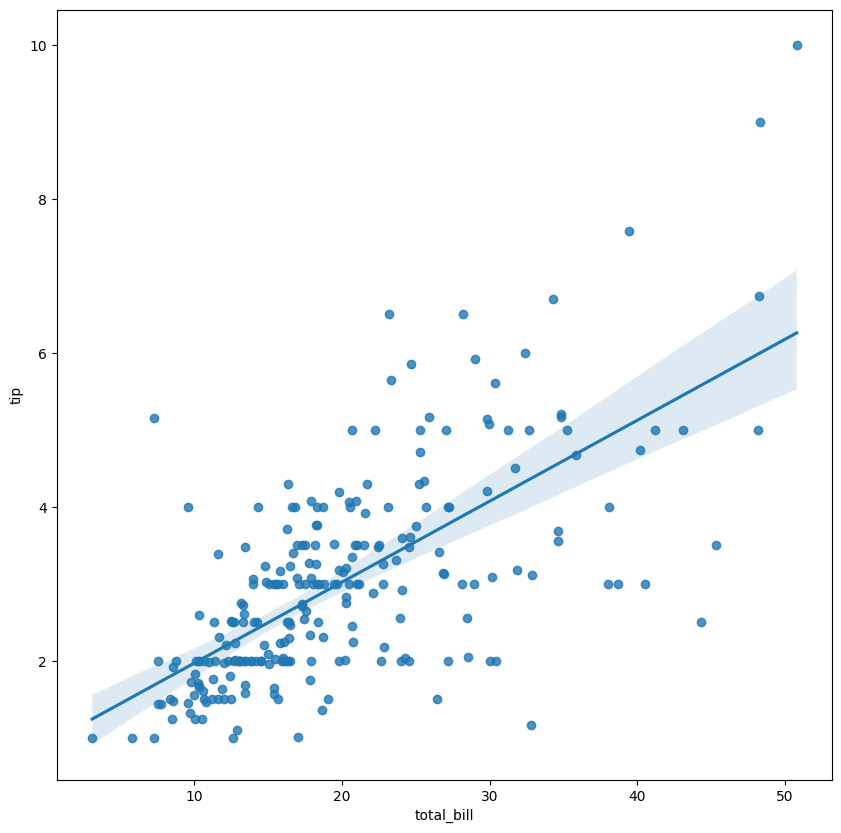

In [6]:
plt.figure(figsize=(10,10))
sns.regplot(x = 'total_bill',y = 'tip',data = tips)

> ## Simple Linear Regression

We start to apply simple linear regression to the dataset:
- Y : Tips
- x : Total Bill

In [7]:
sm_lm = sm.OLS(tips['tip'], sm.add_constant(tips[['total_bill']]))
result = sm_lm.fit()

In [8]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           6.69e-34
Time:                        00:54:35   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

## Interpretation

F-Test:
<br>
B1 : P-Value of the Simultant test (Prob (F-statistics)) is below 0.05. We have enough evidence that totall bill affect tip that given to the food servers.
<br>
Partial Test:
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill has value of zero. in this case, it doesn't make sense that if there is people who paid food freely. So, the interpretation is the model still need B0.
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that higher total bill increase tip that given to the food servers

Parameter Estimate:
1. B0 = 0.9203 : This is not need to be interpreted because there is no people that paid free (x = 0) and 0 also fall outside 3.07 Dollar - 50.81 Dollar interval
1. B1 = 0.1050 : When the total bill increase 1 Dollar, the tip will increase about 0.1050 Dollar or When the total bill increase 10 Dollar, the tip will increase about 1.05 Dollar (*This interpretation only recommended when total bill fall between 3.07 Dollar and 50.81 Dollar)
1. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:
<br>
R-Square = 45.7% : This model can explain 45.7% variation of tips.

🔹 Omnibus = 20.185; Prob(Omnibus) = 0.000 p-value kecil → residual tidak sepenuhnya normal.

🔹 Skew = +0.443 → sedikit miring ke kanan

🔹 Kurtosis = 4.711 → lebih runcing dari normal (yang harusnya 3)

🔹 Durbin-Watson = 2.151 → artinya tidak ada autokorelasi

🔹 JB = 37.75 & p-value = 6.35e-09 → p-value sangat kecil → Tolak H₀: residual tidak normal

In [9]:
from sklearn.linear_model import LinearRegression

X = tips[['total_bill']]      # variabel independen
y = tips['tip']               # variabel dependen

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_)
print("R²:", model.score(X, y))

Intercept: 0.9202696135546731
Slope: [0.10502452]
R²: 0.45661658635167657


In [10]:
import numpy as np
from scipy import stats
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.stattools import omni_normtest  # Omnibus (D'Agostino-Pearson)

y_pred = model.predict(X)
resid = y - y_pred

W, p_shapiro = stats.shapiro(resid)
print(f"\nShapiro-Wilk: W = {W:.4f}, p = {p_shapiro:.6f}")
print(" -> p > 0.05 => tidak tolak normalitas (terdistribusi normal); p <= 0.05 => tolak normalitas (distribusi tidak nomral)")


Shapiro-Wilk: W = 0.9673, p = 0.000022
 -> p > 0.05 => tidak tolak normalitas (terdistribusi normal); p <= 0.05 => tolak normalitas (distribusi tidak nomral)


❗ Normalitas TIDAK termasuk asumsi Gauss–Markov

Normalitas hanya diperlukan ketika kita ingin:

uji t untuk koefisien
uji F untuk model
confidence interval
inferensi berbasis distribusi kecil (n kecil)
Jadi:

Kalau residual tidak normal → uji statistik bisa terganggu
Tapi Gauss–Markov tetap terpenuhi

In [14]:
from statsmodels.stats.diagnostic import het_breuschpagan

# X untuk BP test harus ada konstanta! (seperti desain matriks OLS)
exog = sm.add_constant(X)

bp_stat, bp_pvalue, f_stat, f_pvalue = het_breuschpagan(resid, exog)

print(f"Breusch-Pagan statistic  = {bp_stat:.4f}")
print(f"BP p-value                = {bp_pvalue:.6f}")

Breusch-Pagan statistic  = 47.8765
BP p-value                = 0.000000


❌ Gauss–Markov tidak terpenuhi → OLS tidak lagi BLUE

Namun penting diperhatikan:

❗ OLS tetap unbiased, TAPI tidak lagi efisien

Artinya:

Koefisien β tetap benar secara rata-rata (tidak bias)

Tetapi standard error salah, sehingga:

- uji t bisa jadi salah
- uji F bisa jadi salah
- confidence interval bisa jadi salah
- keputusan statistik menjadi tidak valid

# Python Excercise :  Multiple Linear Regression

> ## Table Of Contents

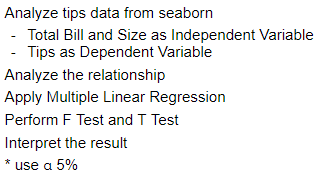

> ## Dataset : Tips Dataset

Framing the problem :
1. Problem Statements : How migh we predict tips that will be recieved by food servers so we can minimize unfair treatment ?
1. Data :
  1. Label : Tips
  1. Features : Total Bill and Size
1. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.
1. Action : Make food servers allocation
1. Value : the sake of staff morale

> ## Library

In [11]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

> ## Data Analysis

To Understand Our Data:
- descriptive statistics
- correlation
- graphical summary

In [12]:
tips[['size','total_bill','tip']]

,size,total_bill,tip
0,2,16.99,1.01
1,3,10.34,1.66
2,3,21.01,3.50
3,2,23.68,3.31
4,4,24.59,3.61
...,...,...,...
239,3,29.03,5.92
240,2,27.18,2.00
241,2,22.67,2.00
242,2,17.82,1.75


In [13]:
tips[['tip','total_bill','size']].describe()

,tip,total_bill,size
count,244.000000,244.000000,244.000000
mean,2.998279,19.785943,2.569672
std,1.383638,8.902412,0.951100
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.900000,17.795000,2.000000
75%,3.562500,24.127500,3.000000
max,10.000000,50.810000,6.000000


In [ ]:
tips[['tip','total_bill','size']].corr()

,tip,total_bill,size
tip,1.000000,0.675734,0.489299
total_bill,0.675734,1.000000,0.598315
size,0.489299,0.598315,1.000000


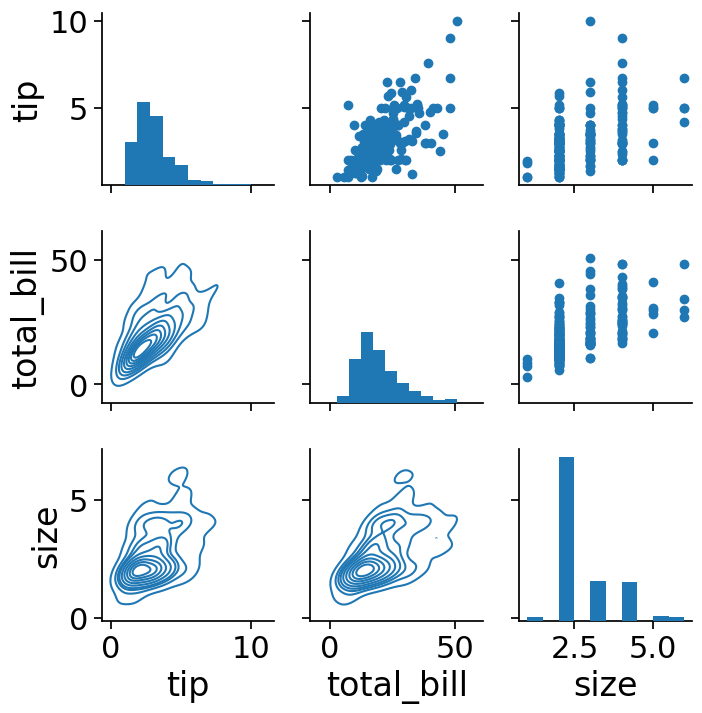

In [ ]:
g = sns.PairGrid(tips[['tip','total_bill','size']])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

> ## Multipple Linear Regression

We start to apply multiple linear regression to the dataset:
- Y : Tips
- x : Total Bill and Size

In [15]:
sm_lm = sm.OLS(tips['tip'], sm.add_constant(tips[['total_bill','size']]))
result = sm_lm.fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           9.67e-34
Time:                        20:52:46   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

## Interpretation

F-Test:
<br>
B1, B2 : P-Value of the Simultant test is below 0.05. We have enough evidence that minimum either totall bill or size affect tip that given to the food servers.
<br>
Partial Test:
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill and size of the party has value of zero. in this case, it doesn't make sense that if there are people who paid food freely and size of the party zero. So, the interpretation is the model still need B0.
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that total bill increase tip that given to the food servers
1. B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that size of the party increase tip that given to the food servers

Parameter Estimate:
1. B0 = 0.689 : This is not meaningfull to be interpreted
1. B1 = 0.0927 : When the total bill increase 1 Dollar, the tip will increase about 0.0927 Dollar or When the total bill increase 10 Dollar, the tip will increase about 9.27 Dollar (*This interpretation only applied when total bill fall between 3.07 Dollar and 50.81 Dollar)
1. B2 = 0.1926 : When the size of the party increase 1 person, the tip will increase about 0.1926 Dollar(*This interpretation only applied when size of the party fall between 1 and 6)
1. It is strongly recommended to interprete within the interval of predictor and no changes in another variable

Coefficient Determination:
<br>
R-Square adj = 46.3% : This model can explain 46.3% variation of tips.
<br>
(* by adding size of the party the coefficient determination increase from 45.7% to 46.3%)


# Python Excercise :  Diagnostics and Collinearity

> ## Table Of Contents

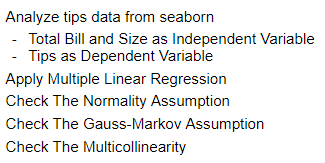

> ## Normality Assumption

/tmp/ipython-input-1439049489.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result.resid)


Text(0.5, 0, 'Residuals')

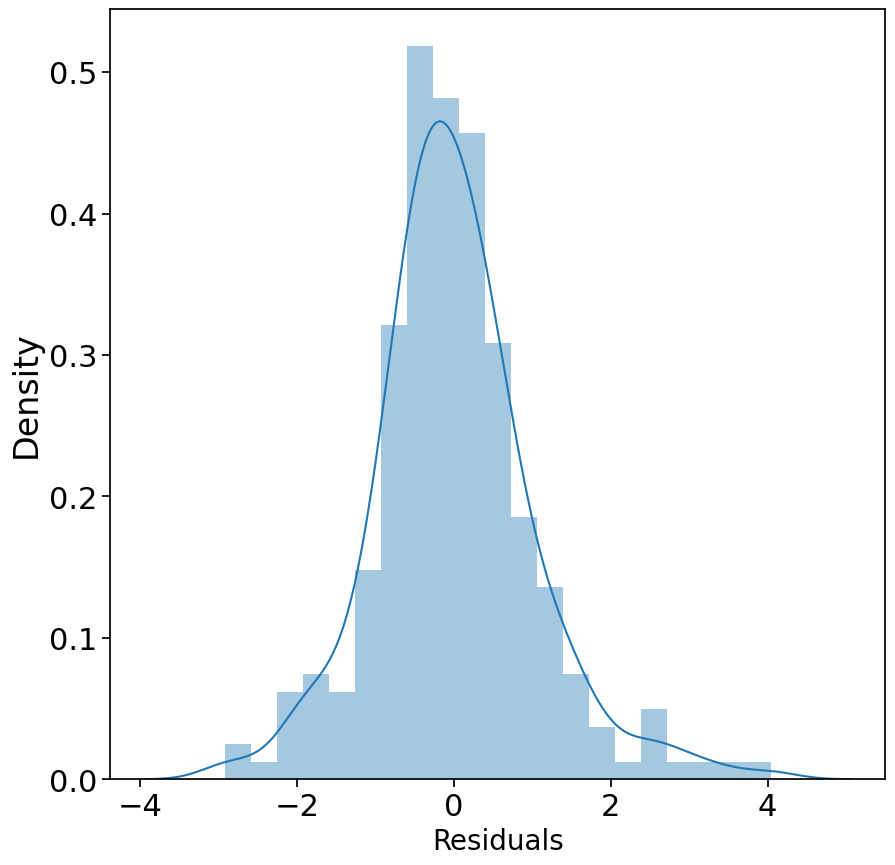

In [16]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20)

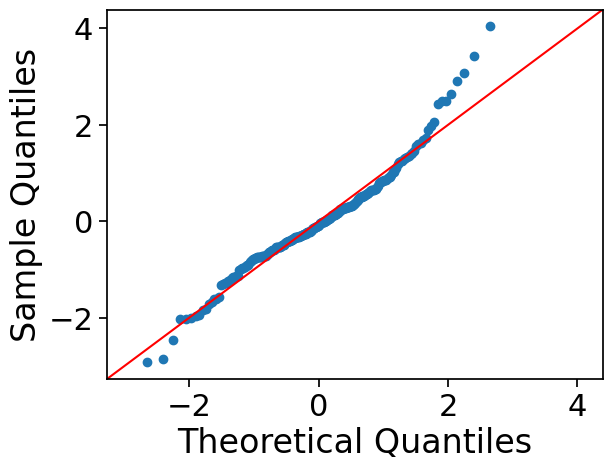

In [17]:
sm.qqplot(result.resid, line = '45')
plt.show()

> ## Gauss-Markov Assumption

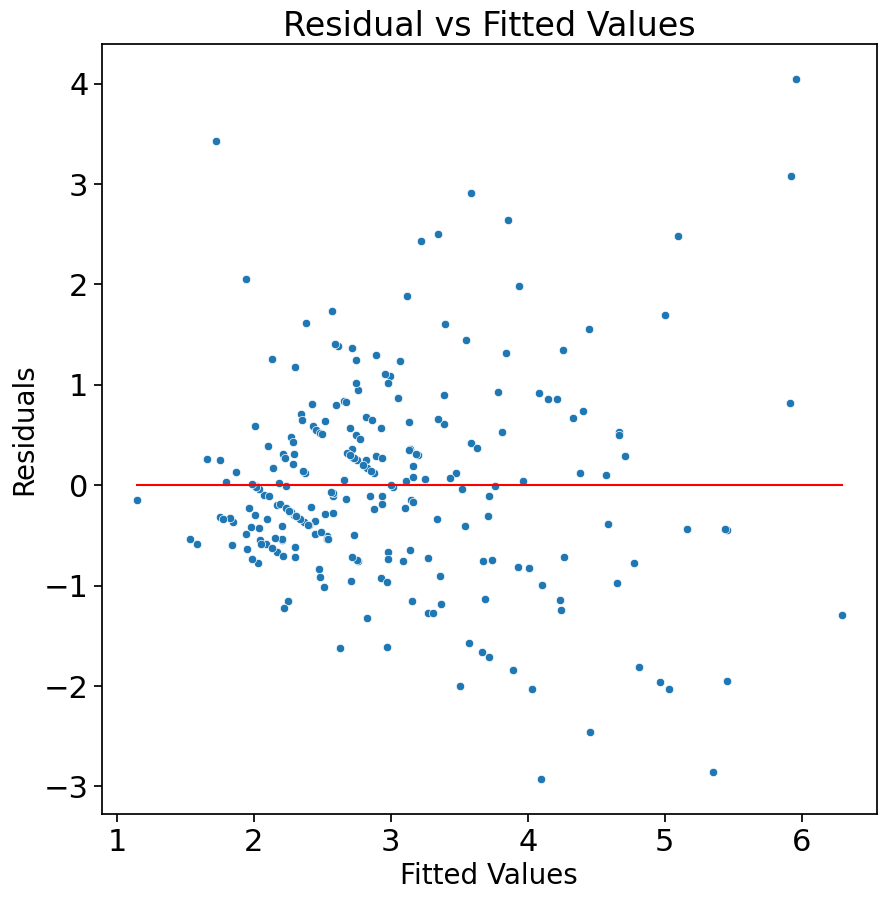

In [18]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)

sns.scatterplot(x=result.fittedvalues, y=result.resid)

sns.lineplot(x=result.fittedvalues, y=[0]*len(result.fittedvalues), color='red')

plt.xlabel('Fitted Values', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residual vs Fitted Values', fontsize=24)

plt.show()


> ## Multicollinearity

In [19]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
calc_vif(tips[['total_bill','size']])

,variables,VIF
0,total_bill,8.684373
1,size,8.684373


> ## Assumption Summary

Assumption Assesment:
1. If we refer to the histogram, the residual seemed normally distributed
1. Model residuals gather around zero
1. No certain pattern in the residual plot
1. Heteroscedasticity Occur
1. vif is not acceptable : this is make sense because there should be relationship between size and total bill. So, actually we only need either total bill or size.

In [22]:
df_categorical = pd.DataFrame({
    'Gender':['Male','Female','Female','Male','Female','Female','Male'],
    'City':['Jakarta','Bogor','Bogor','Bekasi','Bekasi','Jakarta','Bekasi'],
    'Age':[34,28,23,26,29,25,25],
    'Income': [20000000,15000000,7000000,9000000,12000000,11000000,9000000]
})

In [23]:
df_categorical

,Gender,City,Age,Income
0,Male,Jakarta,34,20000000
1,Female,Bogor,28,15000000
2,Female,Bogor,23,7000000
3,Male,Bekasi,26,9000000
4,Female,Bekasi,29,12000000
5,Female,Jakarta,25,11000000
6,Male,Bekasi,25,9000000


In [24]:
df_dummy = pd.get_dummies(df_categorical, drop_first = True)

In [25]:
df_dummy

,Age,Income,Gender_Male,City_Bogor,City_Jakarta
0,34,20000000,True,False,True
1,28,15000000,False,True,False
2,23,7000000,False,True,False
3,26,9000000,True,False,False
4,29,12000000,False,False,False
5,25,11000000,False,False,True
6,25,9000000,True,False,False


In [26]:
X = df_dummy[['Age','Gender_Male','City_Bogor','City_Jakarta']].astype(float)
y = df_dummy['Income'].astype(float)

X = sm.add_constant(X)

model = OLS(y, X).fit()
print(model.summary())

NameError: name 'OLS' is not defined

# Python Excercise :  Dummy Variable

> ## Table Of Contents

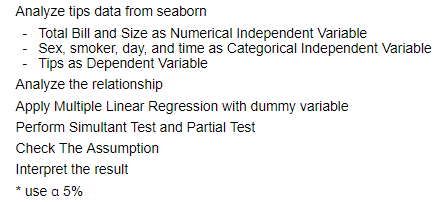

> ## Dummy Variable Preprocessing

We need to do dummy variabel preprocessing for the categorical variable such as sex, smoker, day and time.

In [ ]:
tips_dummy = pd.get_dummies(tips, drop_first = True, columns = ['sex', 'smoker', 'day', 'time'])

In [ ]:
tips_dummy

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,False,True,False,True,False,True
240,27.18,2.00,2,True,False,False,True,False,True
241,22.67,2.00,2,False,False,False,True,False,True
242,17.82,1.75,2,False,True,False,True,False,True


In [ ]:
tips_dummy.columns

Index(['total_bill', 'tip', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'],
      dtype='object')

> ## Linear Regression With Dummy Variable

We start to fit the linear regression Model:
- Y : Tips
- X : Total Bill, size, sex_Female, smoker_No, day_Fri, day_Sat, day_Sun, time_Dinner

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.api import OLS

# pastikan semua numeric
X = tips_dummy[fitur].apply(pd.to_numeric, errors='coerce').astype(float)
y = pd.to_numeric(tips_dummy[target], errors='coerce').astype(float)

# tambah konstanta
X = sm.add_constant(X)

# fit model
model = OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     33.81
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           2.35e-29
Time:                        20:52:47   Log-Likelihood:                -349.51
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     237   BIC:                             737.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7819      0.238      3.285      0.0

> ## Assumption

we will asses some assumption and check the multicollinearity
1. Normality
1. Gauss-Markov
1. Multicollinearity

NORMALITY

/tmp/ipython-input-1439049489.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result.resid)


Text(0.5, 0, 'Residuals')

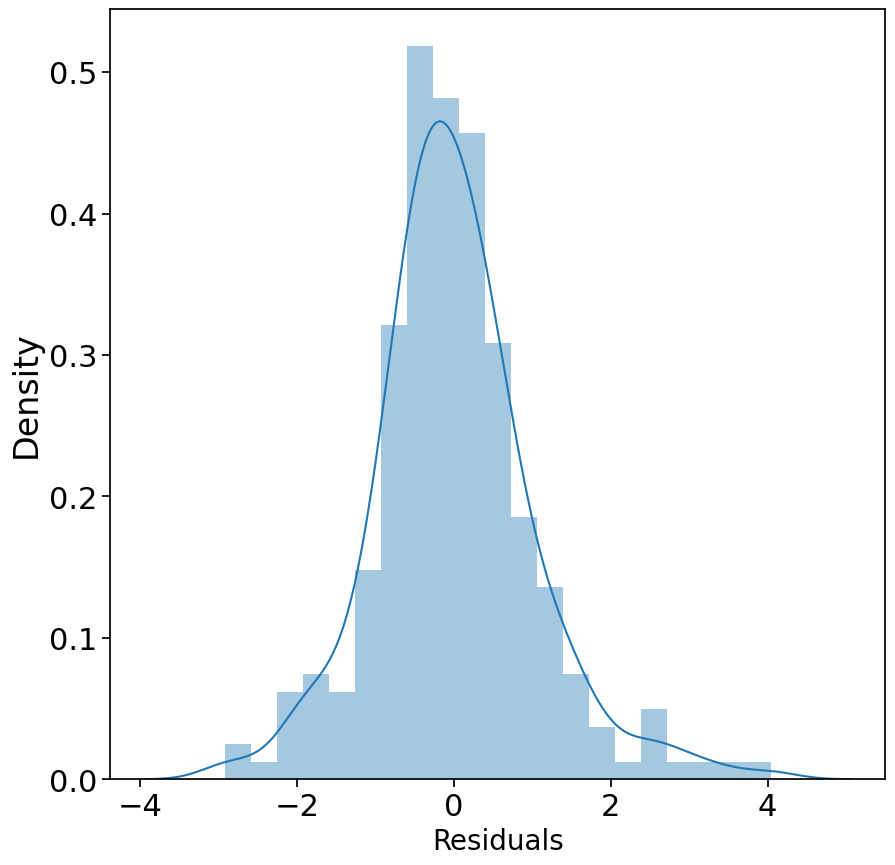

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20)

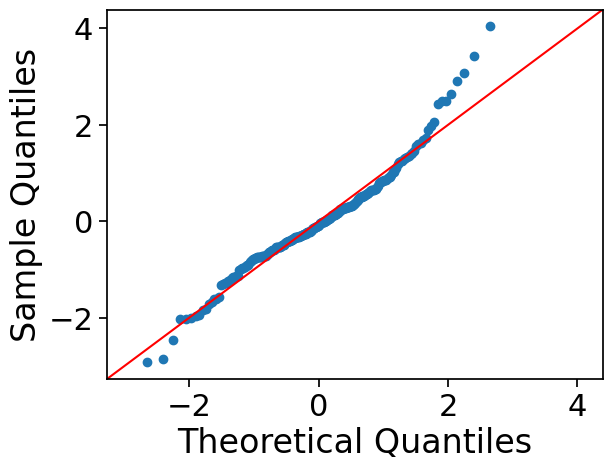

In [ ]:
sm.qqplot(result.resid, line = '45')
plt.show()

GAUSS-MARKOV

Text(0.5, 1.0, 'Residual vs Fitted Plot')

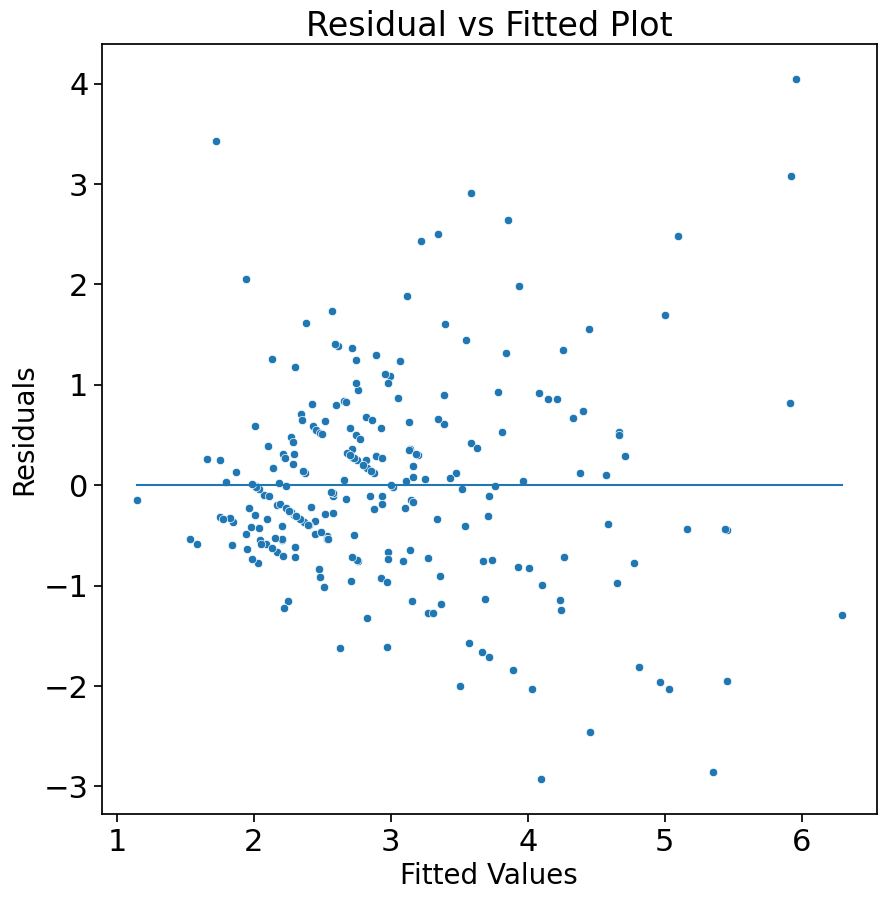

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)

sns.scatterplot(x=result.fittedvalues, y=result.resid)

sns.lineplot(x=result.fittedvalues, y=[0]*len(result.fittedvalues))

plt.xlabel('Fitted Values', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residual vs Fitted Plot')


MULTICOLLINEARITY

In [ ]:
calc_vif(tips_dummy[fitur])

/tmp/ipython-input-2161398981.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df.replace({True: 1, False: 0})


,feature,VIF
0,const,13.073464
1,total_bill,1.059163
2,sex_Female,1.069752
3,smoker_No,1.131765
4,day_Fri,1.298158
5,day_Sat,1.643748
6,day_Sun,1.640341


Assumption Assesment:
1. If we refer to the histogram, the residual seemed normally distributed
1. Model residuals gather around zero
1. No certain pattern in the residual plot
1. Heteroscedasticity Occur
1. vif is not acceptable : this is make sense because there should be relationship between size and total bill. So, actually we only need either total bill or size. time dinner has the highest value of vif, it's reasonable if we exclude time dinner from model.

> ## Model Improvements

We need to improve the model because multicollinearity problem. We refit the linear regression Model with following features:
- Y : Tips
- X : Total Bill, sex_Female, smoker_No, day_Fri, day_Sat, day_Sun

In [ ]:
import pandas as pd
import statsmodels.api as sm

# ------------------------
# 1. Pilih fitur & target
# ------------------------
fitur = ['total_bill', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun']
target = 'tip'

# ------------------------
# 2. Ambil subset data
# ------------------------
df = tips_dummy[fitur + [target]].copy()

# ------------------------
# 3. Bersihkan tipe data
# ------------------------

# Ubah boolean menjadi 0/1
df = df.replace({True: 1, False: 0})

# Pastikan semuanya float
df = df.astype(float)

# ------------------------
# 4. Siapkan X dan y
# ------------------------
X = df[fitur]
y = df[target]

# Tambahkan konstanta
X_const = sm.add_constant(X)

# ------------------------
# 5. Fit model OLS
# ------------------------
model = sm.OLS(y, X_const)
result = model.fit()

# ------------------------
# 6. Print hasil
# ------------------------
print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     33.81
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           2.35e-29
Time:                        20:53:50   Log-Likelihood:                -349.51
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     237   BIC:                             737.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7819      0.238      3.285      0.0

/tmp/ipython-input-3690960796.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [ ]:
def calc_vif(df):
    """
    Menghitung VIF dari dataframe yang isinya hanya fitur numerik.
    Semua boolean otomatis diubah ke 0/1.
    Semua kolom dipaksa menjadi float.
    """
    # ubah boolean ke 0/1
    df_clean = df.replace({True: 1, False: 0})

    # pastikan semua numerik
    df_clean = df_clean.astype(float)

    # tambah konstanta
    X = sm.add_constant(df_clean)

    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]

    return vif_data


# ----------------------------
# Panggil untuk data Anda
# ----------------------------

vif_result = calc_vif(tips_dummy[fitur])
print(vif_result)

      feature        VIF
0       const  13.073464
1  total_bill   1.059163
2  sex_Female   1.069752
3   smoker_No   1.131765
4     day_Fri   1.298158
5     day_Sat   1.643748
6     day_Sun   1.640341


/tmp/ipython-input-2161398981.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df.replace({True: 1, False: 0})


No problem in multicollinearity Anymore

> ## Exercise : Interpret The Latest Result

🔍 1. Residual Plot Sering “Tampak Normal” Meski Tidak Normal Secara Statistik

Plot — biasanya histogram + KDE atau Q–Q plot — hanya memberikan indikasi visual.

Plot akan terlihat itu “normal”, selama residual:
- simetrisnya tidak terlalu buruk
- bentuknya sebagian besar menyerupai lonceng
- outlier tidak terlalu ekstrem

Tetapi uji statistik jauh lebih sensitif, terutama Jarque–Bera.

🔧 2. Pada Output Anda: JB dan Omnibus JELAS Menolak Normalitas

| Statistik | Nilai  | Prob     |
| --------- | ------ | -------- |
| Omnibus   | 24.753 | 0.000    |
| JB        | 46.169 | 9.43e-11 |
| Skew      | 0.545  | —        |
| Kurtosis  | 4.831  | —        |


📌 3. Jadi… Apa Kesimpulannya?

- Visual “terlihat normal” ≠ Normal secara statistik
- JB/Ominbus mendeteksi deviasi kecil
- Residual Anda mengandung right-skew + heavy-tailed
- Ini cukup untuk uji formal menolak normalitas

🔬 4. Apakah Ini Masalah Besar?

Untuk OLS, normalitas residual tidak wajib untuk estimasi koefisien.
Yang penting:

- linearitas
- homoskedastisitas
- tidak ada autokorelasi (DW ≈ 2 bagus)

Normalitas hanya penting untuk:
- inferensi (uji t / uji F),
- membuat CI/interval prediksi.

Dengan n=244, pelanggaran kecil biasanya tidak terlalu bahaya.